In [1]:
import matplotlib
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import numpy as np

In [6]:
File1 = "../Clean Default.csv"
Default_info = pd.read_csv(File1)
Default_info.head()

,Unnamed: 0,BAD,Loan Total,Mortgage Due,Home Value,Reason of Default,Occupation,Years at Job,Major derogatory,Delinquent credit lines,Age Of Oldest Credit Line in Months,Number Of Recent Credit Inquiries,Number of Credit Lines,Debt-to-Income Ratio
0,3538,0,18600,57300.0,8000.0,DebtCon,Other,6.0,NaN,NaN,68.000000,1.0,17.0,NaN
1,40,1,3000,NaN,8800.0,HomeImp,Other,2.0,0.0,1.0,77.766667,0.0,3.0,NaN
2,156,1,5000,NaN,9100.0,HomeImp,Other,1.0,0.0,0.0,54.733333,2.0,8.0,NaN
3,213,1,5200,NaN,9500.0,DebtCon,Other,1.0,0.0,1.0,81.100000,1.0,2.0,NaN
4,940,1,9100,NaN,11550.0,HomeImp,Other,NaN,0.0,0.0,51.933333,1.0,3.0,NaN


In [4]:
File2 = "../Clean Riverside.csv"
RS_info = pd.read_csv(File2)
RS_info = RS_info.drop(columns = ["Unnamed: 0","Unnamed: 0.1","Zipcode","Type"],axis = 1)
RS_info = RS_info.convert_objects(convert_numeric=True)
RS_info['Riverside Zip Codes'] = RS_info['Riverside Zip Codes'].astype(np.float64)
RS_info = RS_info.sort_values("Home Value",ascending = True)
RS_info

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


,Riverside Zip Codes,Home Value
0,92501.0,347600
2,92504.0,376100
5,92507.0,376200
1,92503.0,397300
3,92505.0,402900
4,92506.0,454600
6,92508.0,495800


In [16]:
#Convert the column Home Value from the LB Dataframe to list
Home_Value = [20000,60000,200000,800000]

#Create empty list to store values
Total_list= [];
Default_list = [];
Not_Default_list = [];

#Run a for loop to see all Default table that are less than the current House value i  
for i in Home_Value:
    Tabless = Default_info[Default_info["Home Value"] < i]
    #The following are conditions and can be changed for each city
    Tabless = Tabless[Tabless["Years at Job"] <= 4]
    Tabless = Tabless[Tabless["Mortgage Due"] <= 50000]
    Tabless = Tabless[Tabless["Loan Total"] <= 15000]
    Total = Tabless['BAD'].count()
    Default = (Tabless['BAD'] == 1).sum()
    Not_Default = (Tabless['BAD'] == 0).sum()
    Total_list.append(Total)
    Default_list.append(Default)
    Not_Default_list.append(Not_Default)
     

#Making a DataFrame from the list we were able to obtain 
Numbers = pd.Series(Home_Value)
df = pd.DataFrame({"Total Count of Default & Not Default": Total_list, "Sum of Default": Default_list,"Sum of Not Default":Not_Default_list})
df = df.set_index(Numbers)
df = df.drop_duplicates('Sum of Default')

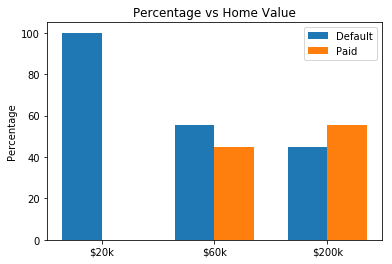

In [17]:
percent_default =(df["Sum of Default"]/df["Total Count of Default & Not Default"]*100).tolist()
percent_not_default = (df["Sum of Not Default"]/df["Total Count of Default & Not Default"]*100).tolist()

ind = np.arange(len(percent_default))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, percent_default, width,label= "Default")
rects2 = ax.bar(ind + width/2, percent_not_default, width, label= "Paid")

ax.set_ylabel('Percentage')
ax.set_title('Percentage vs Home Value')
ax.set_xticks(ind)
ax.set_xticklabels(('$20k','$60k','$200k','$800k'))
ax.legend()
